# Building a web scrapper for News articles related to Financial data and picking Stocks out of it

Project Info

In [1]:
#Group Number - 2
#Group Members - Sai Rahul Prasad Nagumantri, Ayushi Desai, Dhvani Mevawala, Nikhil Aleti, Sree Sriramadas, Afridh Amakundan
#Course - AIDI-1100
#Submission Date - 21-Apr-2022
#Description - This project will scrape the financial news from prnewswire.com and then store the data. Then identify some stock symbols from the data and then take some random stock symbols and then show the stock summary using yahoo finance api. Then for the same stock symbols from the data that is fetched we are plotting closed price of the stock for each day for 6 months of data and the same is for volume of each stock. And also we are showing if the stock is a potential buy or not with red color or green color in the closed price visualization.

#Github Link - 

Importing required packages

In [2]:
import warnings # To ignore warnings
warnings.filterwarnings("ignore")

!pip install dateparser   # pip install dateparser as Google collab is not having dateparser
!pip install yfinance   # pip install yfinance as Google collab is not having yfinance

from bs4 import BeautifulSoup # for parsing the html
import requests # for getting the page content
import pandas as pd # for dataframe
import numpy as np # for array
import xlrd # for reading excel file
import re # for regular expression
import datetime # for date and time
from dateparser import parse # for parsing date
import yfinance as yf # for fetching data from yahoo finance
import random  # for random elements from list
import matplotlib.pyplot as plt # for plotting
from pathlib import Path # for checking if file exists

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


Setting the URL 

In [3]:
scanned_data_url = "https://www.prnewswire.com/news-releases/financial-services-latest-news/financial-services-latest-news-list/?page={page_no}&pagesize={page_size}"


Parsing and Scrapping the data from the News URL page

In [4]:
articles = []    # This is going to store all the articles 

def scrape_data(scanned_data_url):
    page_no=1        # starting the page number from 1
    page_size=100    # setting the page size to 100
    days=7           # Taking data of last 7 days
    breaker=True     # For breaking the loop after 7 days
    latest_time=''    # This is going to store the time of each page
    while breaker:
        req_obj=requests.get(scanned_data_url.format(page_no=page_no,page_size=page_size))
        if req_obj.status_code==200:
            soup_obj=BeautifulSoup(req_obj.text,"html.parser")
            news_articles=soup_obj.find_all("div",{"class":"row arabiclistingcards"})
            for specific_article in news_articles:
                article=dict()
                article_title = specific_article.find("h3").text.replace("\n", "") # removing /n for the news titles and so using replace to replace it with empty string
                article["News_Title"]=article_title
                article["News_Description"]=specific_article.find("p").getText()
                article["News_Time"]=specific_article.find("a").find("h3").find("small").getText()
                latest_time=article["News_Time"]
                articles.append(article)
                if parse(article["News_Time"]).date()< (datetime.datetime.now()-datetime.timedelta(days=days)).date():
                    breaker=False
            print("Page "+str(page_no)+" scrapped till now and it's curresponding date and time is "+latest_time)
            page_no+=1
        else:
            print("Error in getting the page")
            break
        if breaker == False:
            print("Scrapped data of last 7 days")

scrape_data(scanned_data_url)

Page 1 scrapped till now and it's curresponding date and time is Apr 20, 2022, 12:00 ET
Page 2 scrapped till now and it's curresponding date and time is Apr 20, 2022, 08:24 ET
Page 3 scrapped till now and it's curresponding date and time is Apr 19, 2022, 16:57 ET
Page 4 scrapped till now and it's curresponding date and time is Apr 19, 2022, 10:00 ET
Page 5 scrapped till now and it's curresponding date and time is Apr 19, 2022, 08:30 ET
Page 6 scrapped till now and it's curresponding date and time is Apr 18, 2022, 18:00 ET
Page 7 scrapped till now and it's curresponding date and time is Apr 18, 2022, 08:00 ET
Page 8 scrapped till now and it's curresponding date and time is Apr 15, 2022, 08:13 ET
Page 9 scrapped till now and it's curresponding date and time is Apr 14, 2022, 11:28 ET
Page 10 scrapped till now and it's curresponding date and time is Apr 14, 2022, 08:30 ET
Page 11 scrapped till now and it's curresponding date and time is Apr 13, 2022, 14:30 ET
Scrapped data of last 7 days


Saving the Articles to Excel file

In [5]:
#Excel for better readibility :
df = pd.DataFrame(data=articles, columns=['News_Title', 'News_Description', 'News_Time'])
df.index = np.arange(1, len(df)+1)
df.to_excel('financial_news.xls') # saving the data in excel file
path = Path('financial_news.xls') 

# For checking if the saved file exists or not
print("File saved correctly to the same path in which this file is stored and is named as 'financial_news.xls'") if path.is_file() else print("File not saved correctly")

File saved correctly to the same path in which this file is stored and is named as 'financial_news.xls'


Reading the Excel file that is saved to filter the articles

In [6]:
# We can basically use "articles" object to filter out but we are again reading the exvel just to make sure that we are getting the same data and to showcase things are working fine.
file = ("financial_news.xls")
wb = xlrd.open_workbook(file)
sheet = wb.sheet_by_index(0)
sheet.cell_value(1, 1)

#getting back articles from excel file to a dictionary

articles_to_filter = {}
for i in range(1, sheet.nrows):
    title = sheet.cell(i,1).value
    desc = sheet.cell(i,2).value
    articles_to_filter[title] = desc


Filtering the Stock symbols form the whole data

In [7]:
#Filtering articles that has the word nasdaq, nyse and tsx from the description of the article

filtered_articles = {k: v for k, v in articles_to_filter.items() if any(x in v.lower() for x in ['nasdaq:','nyse:','tsx:'])}
stock_symbols = []
for k,v in filtered_articles.items():
    
    # filtering out stock symbols from values of filtered_articles

    if "nasdaq:" in v.lower():
        stock_symbols.append(v.lower()[v.lower().find("nasdaq:")+len("nasdaq:"):].split()[0].upper().replace(')','').replace(']','').replace(';','').replace(',', ''))
    elif "nyse:" in v.lower():
        stock_symbols.append(v.lower()[v.lower().find("nyse:")+len("nyse:"):].split()[0].upper().replace(')','').replace(']','').replace(';','').replace(',', ''))
    elif "tsx:" in v.lower():
        stock_symbols.append(v.lower()[v.lower().find("tsx:")+len("tsx:"):].split()[0].upper().replace(')','').replace(']','').replace(';','').replace(',', ''))

# filtering repeated stock symbols and cluttered data
stock_symbols = list(dict.fromkeys(stock_symbols))   

# filtering out stock symbols with length less than 3
stock_symbols = [x for x in stock_symbols if len(x)>2] 

# remove the special character entries symbol
stock_symbols =[x for x in stock_symbols if x.isalnum()]


print("List of unique stock symbols from NASDAQ, NYSE and TSX are ",stock_symbols)

List of unique stock symbols from NASDAQ, NYSE and TSX are  ['SHG', 'VEON', 'JKS', 'ERIC', 'RIVN', 'MEGI', 'TFC', 'MDC', 'RLGY', 'MKL', 'SHUAU', 'EFX', 'CNS', 'QNST', 'CWAN', 'MCBS', 'EHTH', 'KSPN', 'SEIC', 'MGYR', 'MORN', 'INTU', 'OVBC', 'LEN', 'FHN', 'FFIN', 'BSVN', 'HUT', 'IFS', 'OTEX', 'BKI', 'XIN', 'FTHM', 'ASRV', 'JKHY', 'SLF', 'REAX', 'BHLB', 'NAAC', 'CATC', 'RYB', 'FBC', 'WFG', 'CMA', 'CPF', 'MTB', 'CRNT', 'ACC', 'AMCR', 'FAT', 'FRT', 'DFIN', 'FISV', 'ENVA', 'BFC', 'WSBC', 'HRZN', 'REXR', 'SCM', 'CDR', 'RHI', 'NCBS', 'FNB', 'AFRM', 'STBA', 'ALKT', 'GOL', 'CNA', 'GRCY', 'ESQ', 'MFA', 'CSCW', 'EVRI', 'GIAC', 'FAMI', 'KWR', 'PLD', 'MAN', 'SPNS', 'HHC', 'PRT', 'IMTE', 'TME', 'MBWM', 'LGHL', 'TASK', 'VRT', 'TAL', 'CHCT', 'CRNC', 'FRST', 'NBXG', 'CNO', 'TCBX', 'GPN', 'PRAA', 'PHI', 'NTUS', 'SYF', 'NUZE', 'SWX', 'HSII', 'CNC', 'UNM', 'BTBT', 'TWTR', 'CHT', 'NMRK', 'AVGO', 'TIMB', 'CIVB', 'PBR', 'TRIN', 'NREF', 'NXRT', 'AON', 'NNI', 'BBDC', 'FSK', 'IAC', 'STAG', 'ALEX', 'VRME', 'VWTR',

In [8]:
stock_symbols_random = random.choices(stock_symbols, k=5)  # Taking only first 5 symbols from all the stock symbols
for i,ticker in enumerate(stock_symbols_random):
  current_ticker = yf.Ticker(ticker)
  ticker_info = current_ticker.history(period='6mo')
  history_info = pd.DataFrame(ticker_info[['Close', 'Volume']])
  pd.set_option('display.max_rows', None)
  print("*****************************************************")
  print("Stock data for {}".format(ticker))

  #Suggested to buy a stock if the trend is going up and not to buy if the trend is going down

  print( "Price is increasing for the 6 months data, so this is a potential stock to buy, so BUY STOCK!" if history_info.iloc[-1,0] > history_info.iloc[0,0] else"Price is decreasing from the 6 months data, so this is a potential stock to sell and not suggested to buy, So NOT BUY STOCK!")

  # Insights on the stock 

  print("Starting day close price for the 6 months data of this stock is {}".format(history_info.iloc[0,0].round(2)))
  print("Ending day close price for the 6 months data of this stock is {}".format(history_info.iloc[-1,0].round(2)))
  print("Starting day volume for the 6 months data of this stock is {}".format(history_info.iloc[0,1]))
  print("Ending day volume for the 6 months data of this stock is {}".format(history_info.iloc[-1,1]))
  print("For more info on the specific stock please check STOCK_SYMBOL_"+str(ticker)+".xls file")
  df = pd.DataFrame(data=ticker_info, columns=['Close', 'Volume'])
  df.to_excel('STOCK_SYMBOL_'+ticker+'.xls', index=True)

*****************************************************
Stock data for GPI
Price is decreasing from the 6 months data, so this is a potential stock to sell and not suggested to buy, So NOT BUY STOCK!
Starting day close price for the 6 months data of this stock is 198.22
Ending day close price for the 6 months data of this stock is 173.39
Starting day volume for the 6 months data of this stock is 216400
Ending day volume for the 6 months data of this stock is 129800
For more info on the specific stock please check STOCK_SYMBOL_GPI.xls file
*****************************************************
Stock data for TASK
Price is decreasing from the 6 months data, so this is a potential stock to sell and not suggested to buy, So NOT BUY STOCK!
Starting day close price for the 6 months data of this stock is 61.46
Ending day close price for the 6 months data of this stock is 35.29
Starting day volume for the 6 months data of this stock is 5903600
Ending day volume for the 6 months data of this stock

Closing prices of the stocks for past 6 months

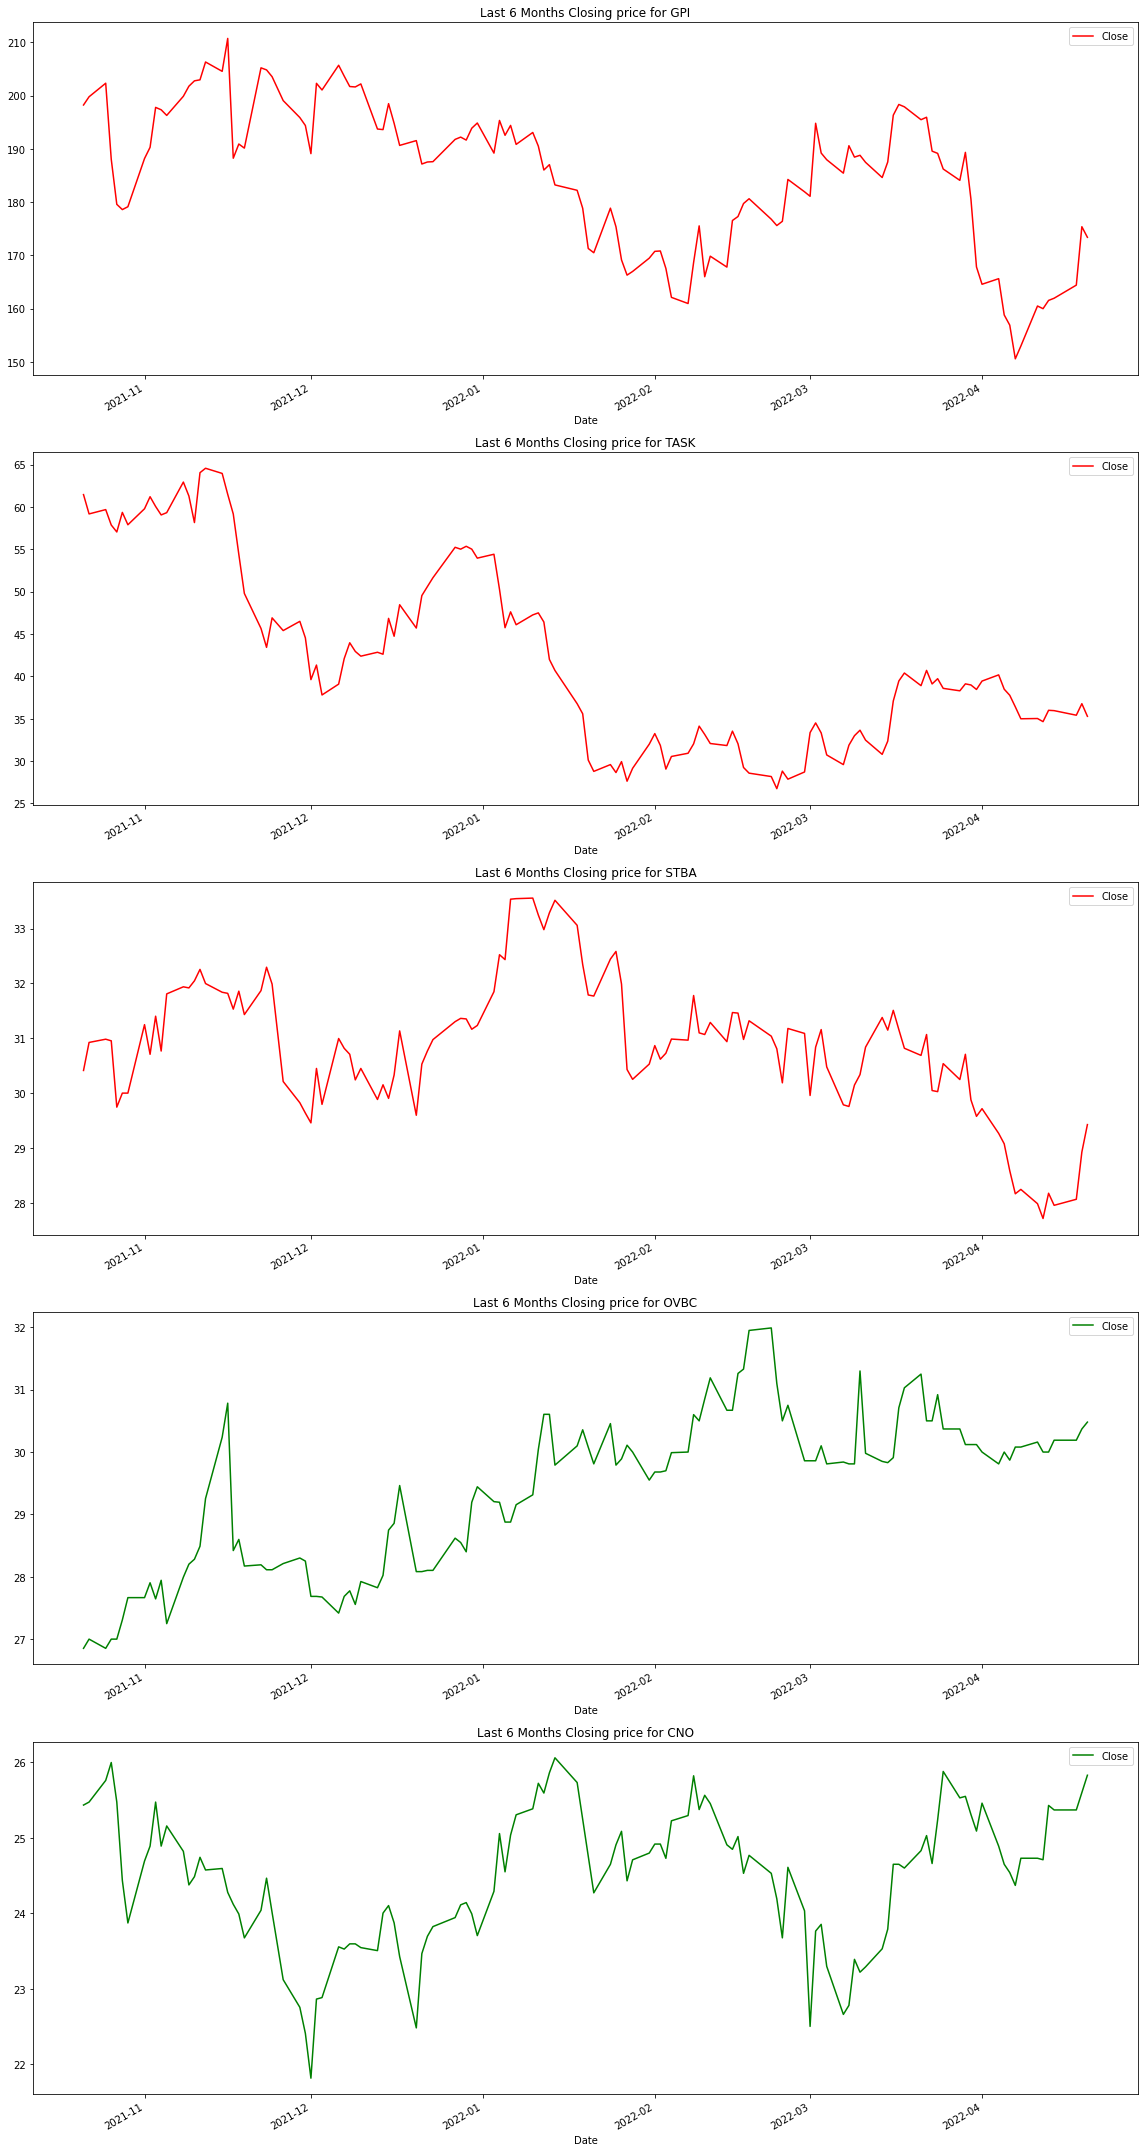

In [11]:
#plotting the data with a line chart

for i,ticker in enumerate(stock_symbols_random):
  current_ticker = yf.Ticker(ticker)
  ticker_info = current_ticker.history(period='6mo')
  history_info = pd.DataFrame(ticker_info[['Close', 'Volume']])
  plt.subplot(len(stock_symbols_random),1,i+1)

  # Here if the price is moving up chart will be green line or else it will be filled with red line
  
  current_ticker.history(period='6mo')['Close'].plot(figsize=(16,30), title='Last 6 Months Closing price for '+ticker, color='green' if history_info.iloc[-1,0] > history_info.iloc[0,0] else 'red') 
  plt.tight_layout()
  plt.legend()

Daily Volume of the stocks for past 6 months

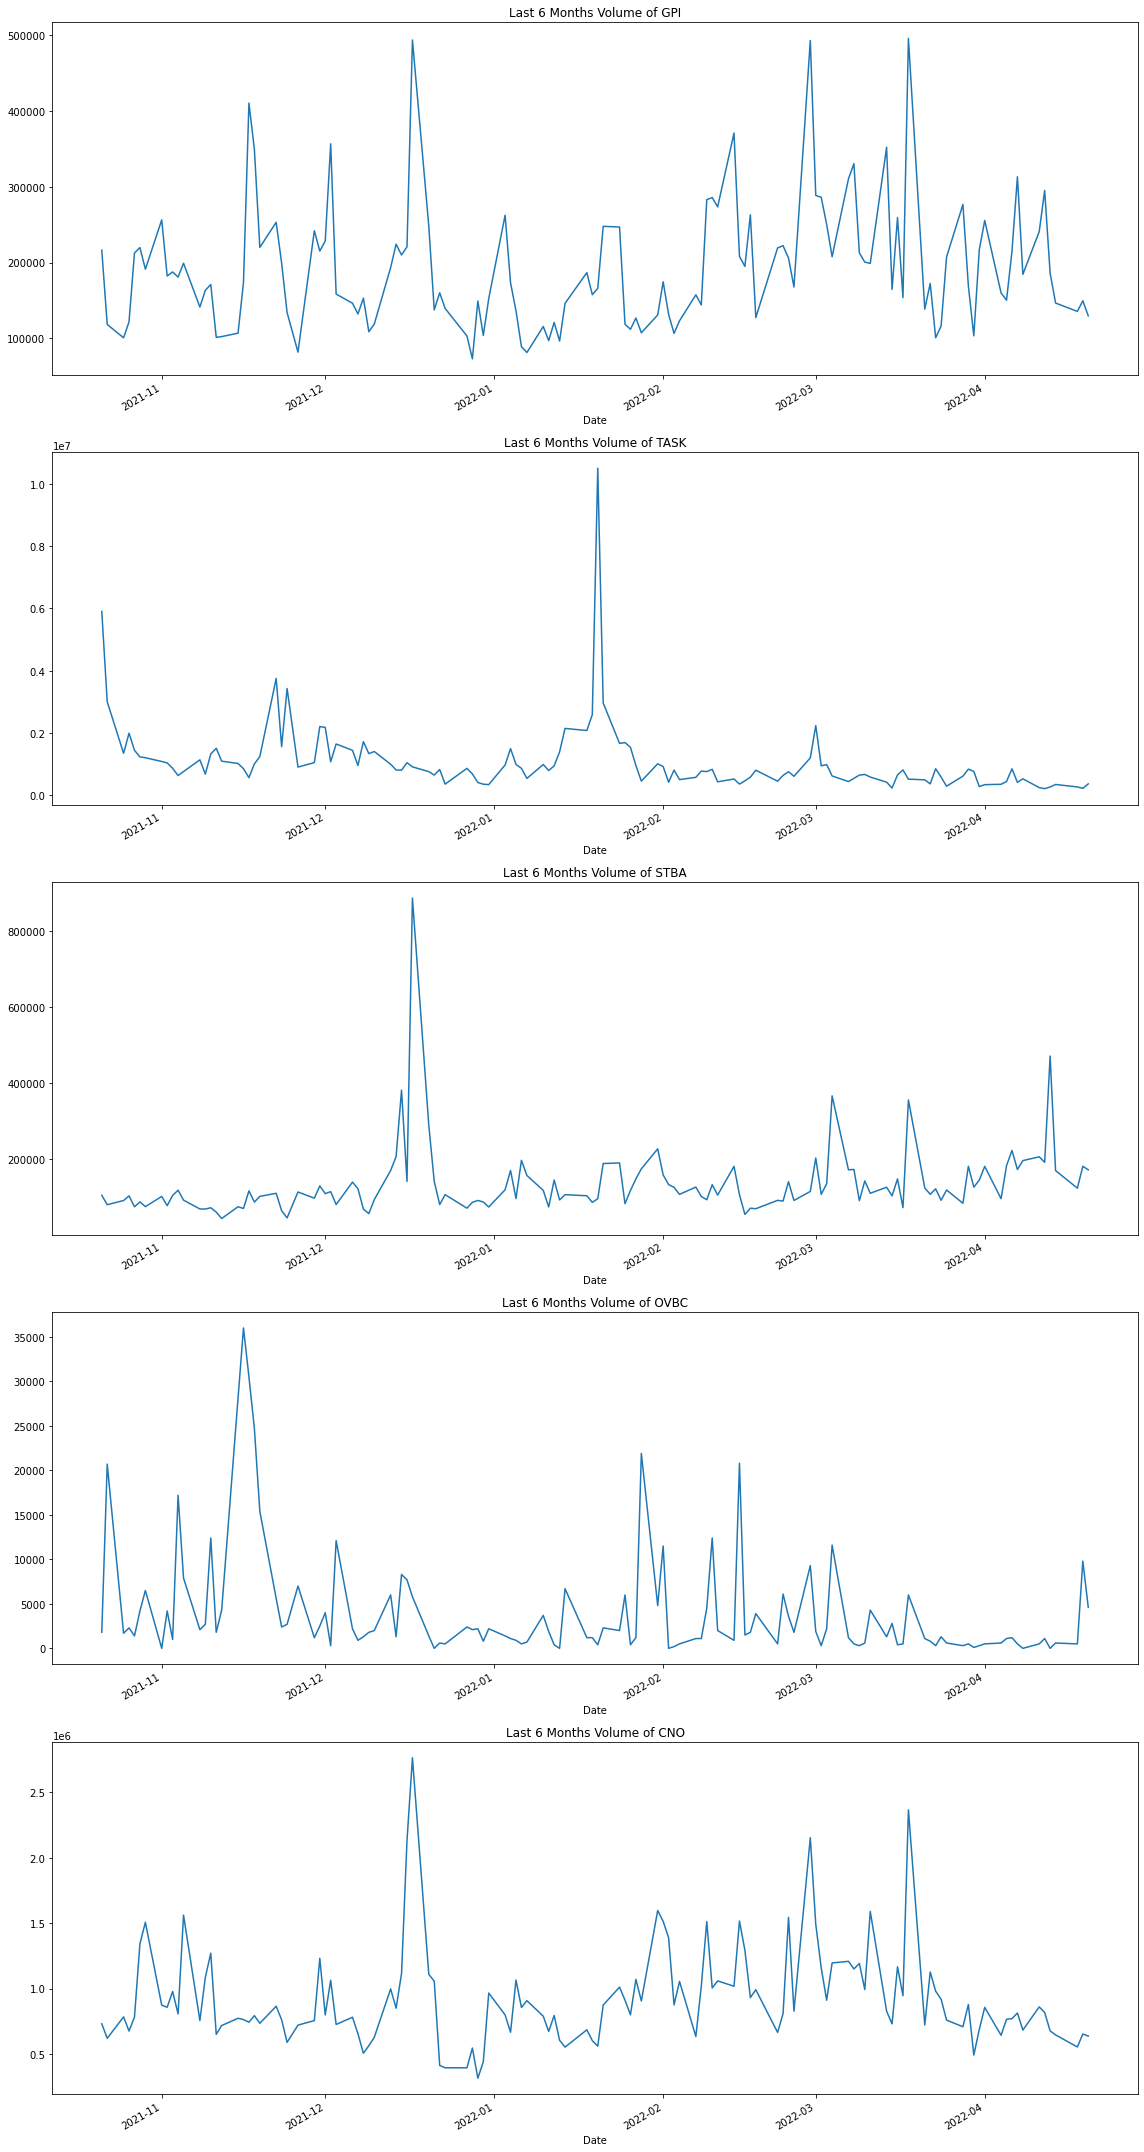

In [12]:
#plotting the data with a line chart

for i,ticker in enumerate(stock_symbols_random):
  current_ticker = yf.Ticker(ticker)
  plt.subplot(len(stock_symbols_random),1,i+1)
  current_ticker.history(period='6mo')['Volume'].plot(figsize=(16,30), title='Last 6 Months Volume of '+ticker)
  plt.tight_layout()